In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('marketing_AB.csv')

In [5]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [6]:
df.duplicated(subset='user id').sum()

0

In [7]:
df.drop(['Unnamed: 0','user id'], axis=1, inplace=True)

In [8]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [9]:
df_cat = df[['test group', 'converted', 'most ads day',
       'most ads hour']]
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [10]:
for i in df_cat:
    print(i.upper(),':',df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


UNIVARIATE ANALYSIS

Text(0.5, 1.0, 'Pie Chart - test group')

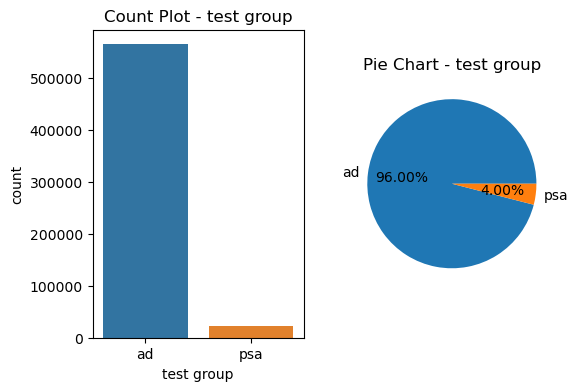

In [11]:
variable = 'test group'

plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat)
plt.title(f'Count Plot - {variable}')

plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct = '%0.2f%%')
plt.title(f'Pie Chart - {variable}')




Text(0.5, 1.0, 'Pie Chart - converted')

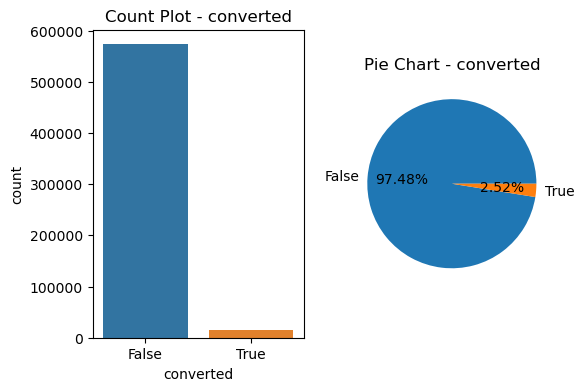

In [12]:
variable = 'converted'

plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat)
plt.title(f'Count Plot - {variable}')

plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct = '%0.2f%%')
plt.title(f'Pie Chart - {variable}')




Text(0.5, 1.0, 'Pie Chart - most ads day')

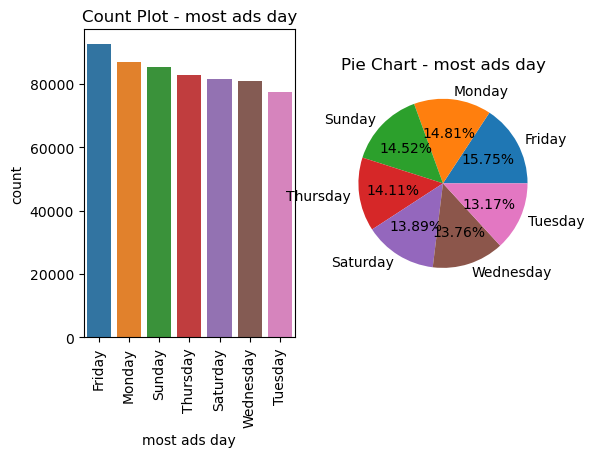

In [13]:
variable = 'most ads day'

plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat, order=df_cat['most ads day'].value_counts().index)
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct = '%0.2f%%')
plt.title(f'Pie Chart - {variable}')




Text(0.5, 1.0, 'Pie Chart - most ads hour')

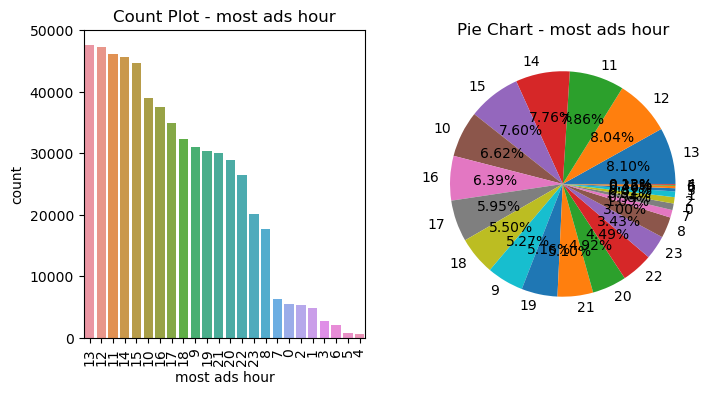

In [14]:
variable = 'most ads hour'

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat, order=df_cat['most ads hour'].value_counts().index)
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct = '%0.2f%%')
plt.title(f'Pie Chart - {variable}')

Text(0.5, 1.0, 'Boxplot - total ads')

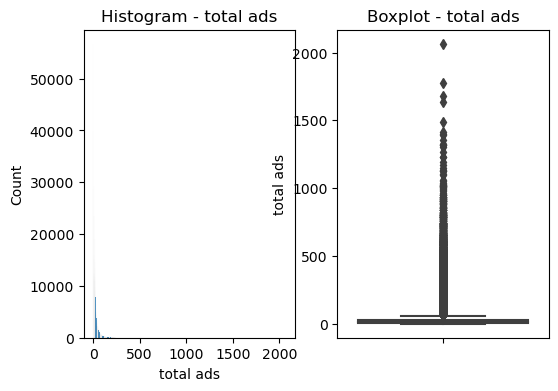

In [15]:
variable = 'total ads'

plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.histplot(x=variable, data=df)
plt.title(f'Histogram - {variable}')

plt.subplot(1,2,2)
sns.boxplot(y=variable, data=df)
plt.title(f'Boxplot - {variable}')

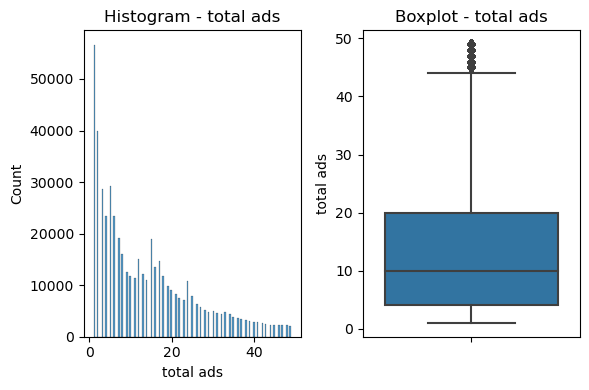

In [16]:
variable = 'total ads'

plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.histplot(x=variable, data=df[df['total ads'] < 50])
plt.title(f'Histogram - {variable}')

plt.subplot(1,2,2)
sns.boxplot(y=variable, data=df[df['total ads'] < 50])
plt.title(f'Boxplot - {variable}')

plt.tight_layout()

BIVARAITE ANALYSIS

In [17]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [18]:
cat_conv_test_grp = pd.crosstab(df['test group'],df['converted'], normalize='index')
cat_conv_test_grp

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


<Axes: xlabel='test group'>

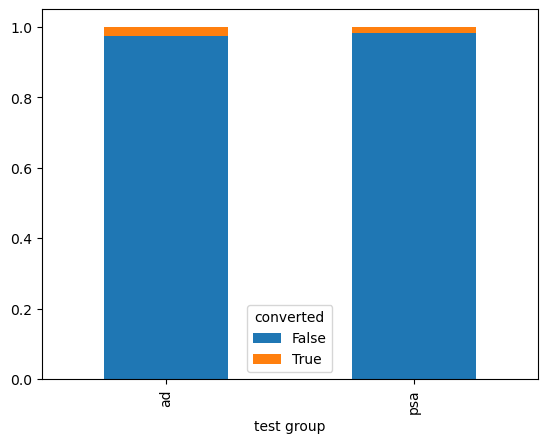

In [19]:
cat_conv_test_grp.plot.bar(stacked=True)

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


<Axes: xlabel='most ads day'>

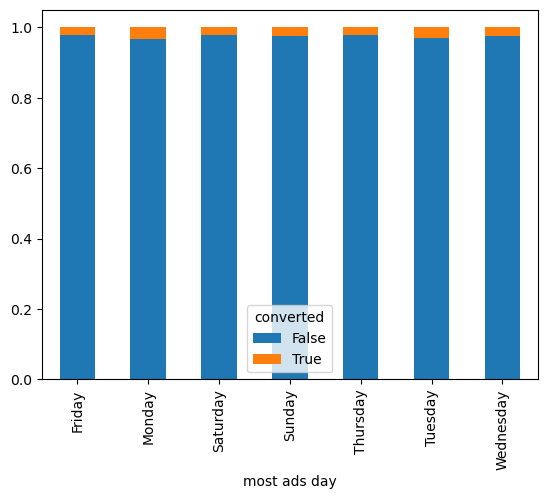

In [20]:
cat_conv_day = pd.crosstab(df['most ads day'],df['converted'], normalize='index')
print(cat_conv_day.sort_values(by=True,ascending=False))
cat_conv_day.plot.bar(stacked=True)

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


<Axes: xlabel='most ads hour'>

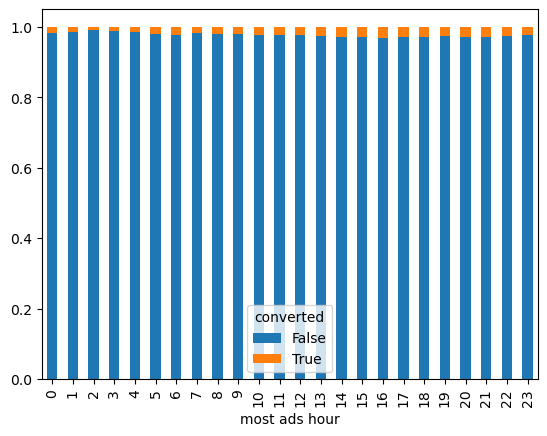

In [21]:
cat_conv_hour = pd.crosstab(df['most ads hour'],df['converted'], normalize='index')
print(cat_conv_hour.sort_values(by=True,ascending=False))
cat_conv_hour.plot.bar(stacked=True)

<Axes: xlabel='converted', ylabel='total ads'>

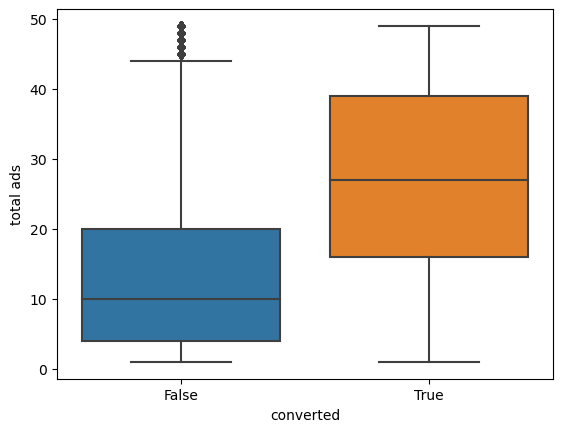

In [22]:
sns.boxplot(x='converted',y='total ads',data=df[df['total ads'] < 50])

STATISTICAL ANALYSIS

(Performing for categorical )

Null Hypothesis H0 = There is no significant difference between conversion rates and other categorical variables(test_group, most ads hour, most ads day)

Alternative Hypothesis H1 = There is significant difference between conversion rates and other categorical variables(test_group, most ads hour, most ads day)


In [23]:
from scipy.stats import chi2_contingency
alpha = 0.05
for var in df_cat.columns:
    if var!='converted':
        cont_table = pd.crosstab(df_cat[var], df_cat['converted'])
        chi2, p, _, _ =chi2_contingency(cont_table)

        print(f"\nChi-Squared Test for {var} vs. Converted:")
        print(f"chi Squared Value: {chi2}")
        print(f"p-value: {p}")

    


Chi-Squared Test for test group vs. Converted:
chi Squared Value: 54.005823883685245
p-value: 1.9989623063390075e-13

Chi-Squared Test for most ads day vs. Converted:
chi Squared Value: 410.0478857936585
p-value: 1.932184379244731e-85

Chi-Squared Test for most ads hour vs. Converted:
chi Squared Value: 430.76869230822086
p-value: 8.027629823696771e-77


As we can see all the p-values for the three categories is less than alpha(0.05). We can reject the null hypothesis

Null Hypothesis H0: There is no significant difference in total ads between the two groups.
Alternative Hypothesis H1: There is significant difference in total ads between the two groups.

In [24]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

#checking for normality

shapiro_stat_true, shapiro_pvalue_true = shapiro([df[df['converted']== True] ['total ads']])
shapiro_stat_false, shapiro_pvalue_false = shapiro([df[df['converted']== False] ['total ads']])

print(f"Shapiro-Wilk test for normality(True Group): p-value = {shapiro_pvalue_true}")
print(f"Shapiro-Wilk test for normality(False Group): p-value = {shapiro_pvalue_false}")
alpha

#checking for equality of variances
levene_stat, levene_pvalue = levene(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
print(f"Levene's test for variances: p-value = {levene_pvalue}")




C:\Users\kavya\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk test for normality(True Group): p-value = 0.0
Shapiro-Wilk test for normality(False Group): p-value = 0.0
Levene's test for variances: p-value = 0.0


In [26]:
alpha = 0.05

if shapiro_pvalue_true>alpha and shapiro_pvalue_false>alpha and levene_pvalue>alpha:
    t_stat,t_p_value = ttest_ind(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
    print(f'Independent ttest pvalue = {t_p_value} ')
    
else:
    u_stat,u_pvalue = mannwhitneyu(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
    print(f'Mann Whitney U-test p-value = {u_pvalue}')

    

Mann Whitney U-test p-value = 0.0


since the p-value(0.0)<0.05 we reject the null hypothesis and conclude that there is a significant difference in total ads between the converted and non-converted groups.